In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [256]:
df_train=pd.read_csv("/content/Titanic_train.csv")
df_test=pd.read_csv("/content/Titanic_test.csv")

In [257]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [258]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [259]:
df_train["Code"]=1
df_test["Code"]=2

In [260]:
data=pd.concat([df_train,df_test])


In [261]:
# PassengerId: Unique identifier for each passenger.
# Survived: Indicates whether the passenger survived (1) or not (0).
# Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). A proxy for socio-economic status.
# Name: Passenger's name.
# Sex: Passenger's gender (male or female).
# Age: Passenger's age in years.
# SibSp: Number of siblings / spouses aboard the Titanic.
# Parch: Number of parents / children aboard the Titanic.
# Ticket: Ticket number.
# Fare: Passenger fare.
# Cabin: Cabin number.
# Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
# Code: A column  added to distinguish between training and test data (1 for training, 2 for test).


In [262]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,2
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,2
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,2


In [263]:
data.shape


(1309, 13)

In [264]:
data["Code"].value_counts()

,count
Code,
1,891
2,418


In [265]:
data[data.duplicated()].shape

(0, 13)

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Code         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [267]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Code
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,1.319328
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,2.000000


In [268]:
#percentage of missing values
data.isnull().sum()/len(data)*100

,0
PassengerId,0.000000
Survived,31.932773
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.091673
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.076394


In [269]:
#77.5% missing values in cabin column,droping the cabin column
data.drop('Cabin',inplace=True,axis=1)

In [270]:


data["Age"].fillna(data["Age"].median(),inplace=True)
data["Fare"].fillna(data["Fare"].median(),inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)


In [271]:
data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [272]:
numerical_cols=data.select_dtypes(include=["int64","float64"]).columns


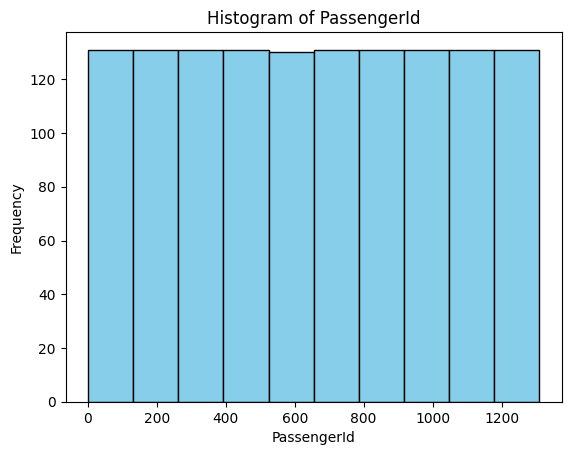

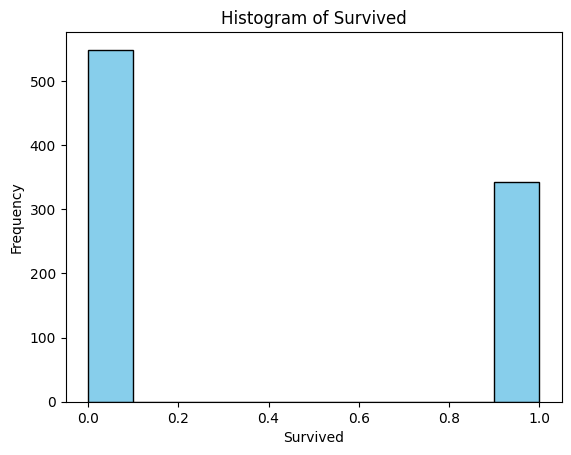

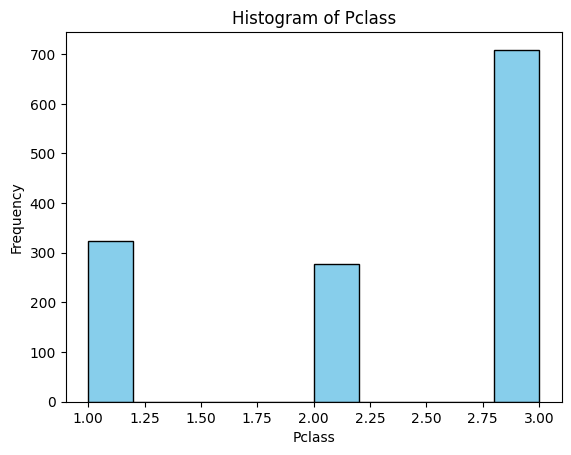

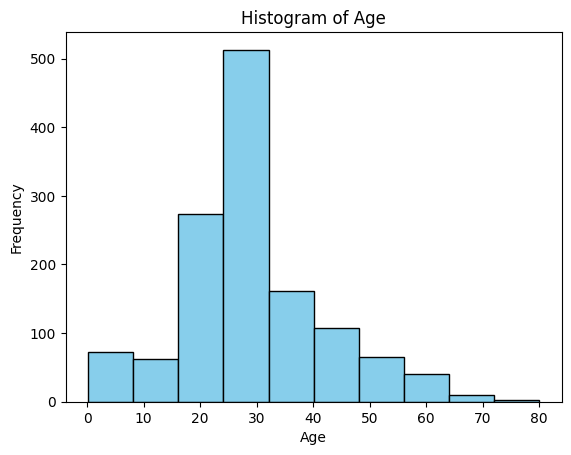

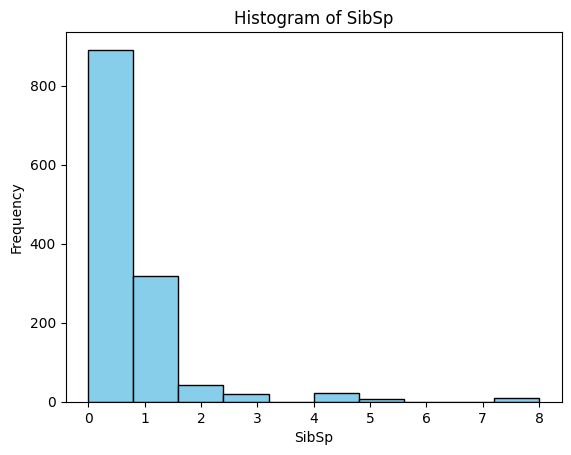

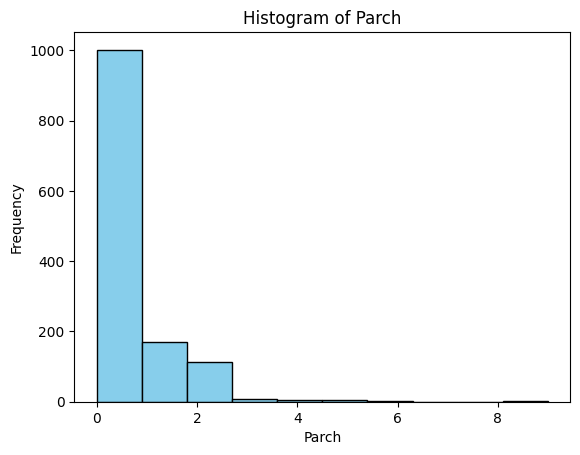

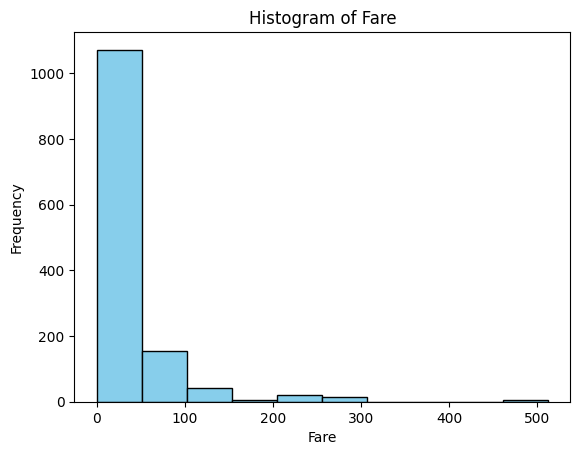

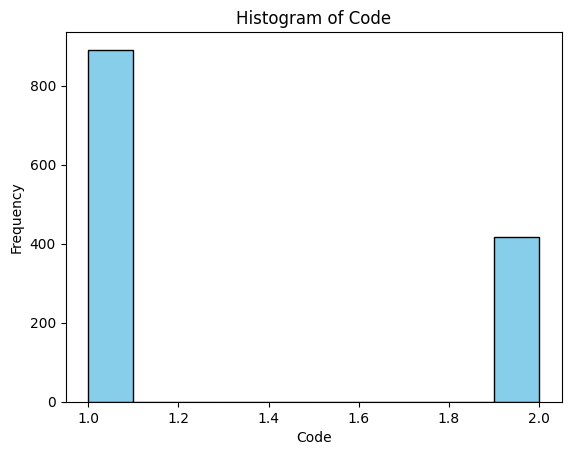

In [273]:
for column in numerical_cols:
  plt.hist(data[column],color="skyblue",edgecolor="black")
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()


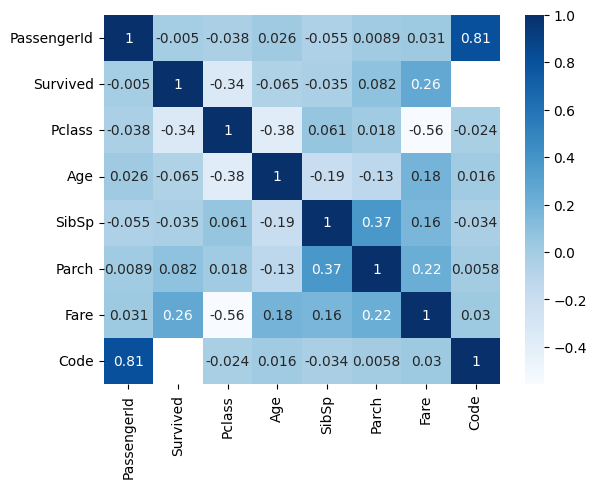

In [274]:
sns.heatmap(data[numerical_cols].corr(),annot=True,cmap="Blues")
plt.show()

In [275]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])

In [276]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Code
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,28.0,0,0,A.5. 3236,8.0500,S,2
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C,2
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,2
416,1308,NaN,3,"Ware, Mr. Frederick",1,28.0,0,0,359309,8.0500,S,2


In [278]:
#drop the columns which are not required
data.drop(["Name","Ticket","Embarked"],axis=1,inplace=True)

In [279]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Code
0,1,0.0,3,1,22.0,1,0,7.2500,1
1,2,1.0,1,0,38.0,1,0,71.2833,1
2,3,1.0,3,0,26.0,0,0,7.9250,1
3,4,1.0,1,0,35.0,1,0,53.1000,1
4,5,0.0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1,28.0,0,0,8.0500,2
414,1306,NaN,1,0,39.0,0,0,108.9000,2
415,1307,NaN,3,1,38.5,0,0,7.2500,2
416,1308,NaN,3,1,28.0,0,0,8.0500,2


In [280]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[["Age"]] = sc.fit_transform(data[["Age"]])
data[["Fare"]] = sc.fit_transform(data[["Fare"]])
data[["SibSp"]] = sc.fit_transform(data[["SibSp"]])
data[["Parch"]] = sc.fit_transform(data[["Parch"]])



In [281]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Code
0,1,0.0,3,1,-0.581628,0.481288,-0.445000,-0.503291,1
1,2,1.0,1,0,0.658652,0.481288,-0.445000,0.734744,1
2,3,1.0,3,0,-0.271558,-0.479087,-0.445000,-0.490240,1
3,4,1.0,1,0,0.426099,0.481288,-0.445000,0.383183,1
4,5,0.0,3,1,0.426099,-0.479087,-0.445000,-0.487824,1
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1,-0.116523,-0.479087,-0.445000,-0.487824,2
414,1306,NaN,1,0,0.736169,-0.479087,-0.445000,1.462034,2
415,1307,NaN,3,1,0.697411,-0.479087,-0.445000,-0.503291,2
416,1308,NaN,3,1,-0.116523,-0.479087,-0.445000,-0.487824,2


In [282]:
df_train=data[data["Code"]==1]
df_test=data[data["Code"]==2]

In [283]:
df_train.shape


(891, 9)

In [284]:
df_test.shape

(418, 9)

In [285]:
x_train=df_train[["Pclass","Sex","Age","SibSp","Parch","Fare"]]
y_train=df_train[["Survived"]]
x_test=df_test[["Pclass","Sex","Age","SibSp","Parch","Fare"]]
y_test=df_test[["Survived"]]


In [286]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [287]:
lr.fit(x_train,y_train)

LogisticRegression()

In [288]:
y_pred_train=lr.predict(x_train)

In [289]:
y_pred_train

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [290]:
lr.coef_

array([[-1.05034604, -2.64962505, -0.49205381, -0.34913646, -0.08273538,
         0.15371145]])

In [291]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [292]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [293]:
acs=accuracy_score(y_train,y_pred_train)
pc=precision_score(y_train,y_pred_train)
rs=recall_score(y_train,y_pred_train)
f1=f1_score(y_train,y_pred_train)

result=pd.DataFrame([["Logisticregression",acs,pc,rs,f1]],
                    columns=["Model","Accuracy","Precision","Recall","F1 score"])

In [294]:
result

,Model,Accuracy,Precision,Recall,F1 score
0,Logisticregression,0.795735,0.745399,0.710526,0.727545


In [295]:
from sklearn.metrics import roc_auc_score,roc_curve

In [297]:
df_train["Y_proba"]=lr.predict_proba(x_train)[:,1]

In [298]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Code,Y_proba
0,1,0.0,3,1,-0.581628,0.481288,-0.445000,-0.503291,1,0.098560
1,2,1.0,1,0,0.658652,0.481288,-0.445000,0.734744,1,0.892545
2,3,1.0,3,0,-0.271558,-0.479087,-0.445000,-0.490240,1,0.650454
3,4,1.0,1,0,0.426099,0.481288,-0.445000,0.383183,1,0.898201
4,5,0.0,3,1,0.426099,-0.479087,-0.445000,-0.487824,1,0.085372
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,-0.194041,-0.479087,-0.445000,-0.392119,1,0.268685
887,888,1.0,1,0,-0.814181,-0.479087,-0.445000,-0.063437,1,0.954969
888,889,0.0,3,0,-0.116523,0.481288,1.866526,-0.190076,1,0.516080
889,890,1.0,1,1,-0.271558,-0.479087,-0.445000,-0.063437,1,0.534373


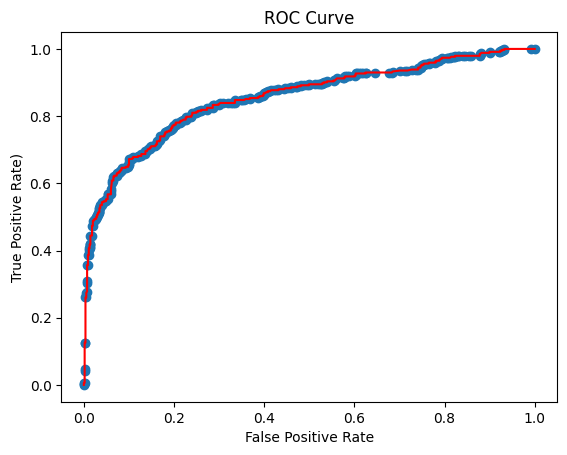

In [299]:
fpr,tpr,thresholds=roc_curve(df_train["Survived"],df_train["Y_proba"])
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate)")
plt.title("ROC Curve")
plt.show()


In [300]:
roc_auc_score = roc_auc_score(df_train["Survived"], df_train["Y_proba"])

In [301]:
roc_auc_score

0.8545334952438777

In [302]:

# a. Interpret the coefficients of the logistic regression model.
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lr.coef_[0]
})
print(coefficients)
print("\nInterpretation of Coefficients:")
print("-------------------------------")
for index, row in coefficients.iterrows():
    feature = row['Feature']
    coefficient = row['Coefficient']
    if coefficient > 0:
        interpretation = f"A one-unit increase in '{feature}' is associated with an increase in the log-odds of survival."
    else:
        interpretation = f"A one-unit increase in '{feature}' is associated with a decrease in the log-odds of survival."
    print(f"- {feature}: {interpretation}")

# b. Discuss the significance of features in predicting the target variable (survival probability in this case).
print("\nSignificance of Features:")
print("--------------------------")
print("- **Pclass:** A negative coefficient suggests that passengers in lower classes (higher Pclass values) had lower chances of survival.")
print("- **Sex:** A negative coefficient indicates that being male was associated with a decreased likelihood of survival.")
print("- **Age:** The negative coefficient implies that older passengers generally had lower survival rates.")
print("- **SibSp:** A negative coefficient suggests that having more siblings or spouses on board was associated with lower survival chances.")
print("- **Parch:** The negative coefficient indicates that having more parents or children on board was linked to lower survival rates.")
print("- **Fare:** A positive coefficient suggests that passengers who paid higher fares had better chances of survival.")


  Feature  Coefficient
0  Pclass    -1.050346
1     Sex    -2.649625
2     Age    -0.492054
3   SibSp    -0.349136
4   Parch    -0.082735
5    Fare     0.153711

Interpretation of Coefficients:
-------------------------------
- Pclass: A one-unit increase in 'Pclass' is associated with a decrease in the log-odds of survival.
- Sex: A one-unit increase in 'Sex' is associated with a decrease in the log-odds of survival.
- Age: A one-unit increase in 'Age' is associated with a decrease in the log-odds of survival.
- SibSp: A one-unit increase in 'SibSp' is associated with a decrease in the log-odds of survival.
- Parch: A one-unit increase in 'Parch' is associated with a decrease in the log-odds of survival.
- Fare: A one-unit increase in 'Fare' is associated with an increase in the log-odds of survival.

Significance of Features:
--------------------------
- **Pclass:** A negative coefficient suggests that passengers in lower classes (higher Pclass values) had lower chances of survival.


In [ ]:
#1. What is the difference between precision and recall?
#Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In other words, it measures the accuracy of the positive predictions. It is calculated as:

Precision=True Positives/True Positives+False Positives

#Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that are correctly identified by the model. It is calculated as:

Recall=True Positives/True Positives+False Negatives

In [ ]:
#2. What is cross-validation, and why is it important in binary classification?


Cross-validation is a technique used to assess the performance of machine learning models by splitting the dataset into
multiple subsets (folds) and training the model on different combinations of these subsets.
It helps to evaluate the model's performance in a more robust way compared to a single train-test split.

In [ ]:
#cross-validation is an essential technique in binary classification for obtaining reliable performance estimates,
reducing overfitting, and optimizing model hyperparameters.